<a href="https://colab.research.google.com/github/Tend0Dev/DataBase_exam/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from random import sample
import numpy as np
from sklearn.model_selection import train_test_split
import graphviz

In [ ]:
# Upload the file
uploaded = files.upload()


Saving credit_card_fraud_filtered.csv to credit_card_fraud_filtered.csv


In [ ]:
filename = list(uploaded.keys())[0]

In [ ]:
# Leer el archivo CSV
df = pd.read_csv(filename)

df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [ ]:
# Seleccionar las columnas específicas
columnas_deseadas = ['amt', 'merch_lat', 'merch_long', 'lat', 'long', 'is_fraud']
df_seleccionado = df[columnas_deseadas]

# Seleccionar 3 columnas aleatorias sin reemplazo
columnas_aleatorias = df_seleccionado.sample(n=3, axis=1, replace=False)

print("Columnas seleccionadas aleatoriamente:")
print(columnas_aleatorias.columns)

# Crear el modelo de bosque aleatorio
bosque = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_features="sqrt",
    bootstrap=True,
    max_samples=2/3,
    oob_score=True,
    random_state=42
)

# Entrenar el modelo con las columnas seleccionadas aleatoriamente y la variable objetivo
bosque.fit(columnas_aleatorias.values, df['is_fraud'].values)

# Verificar que el modelo se ha entrenado
print("\nModelo entrenado correctamente.")
print("Puntuación en el subconjunto de entrenamiento:", bosque.score(columnas_aleatorias.values, df['is_fraud'].values))
print("Puntuación OOB:", bosque.oob_score_)

Columnas seleccionadas aleatoriamente:
Index(['is_fraud', 'long', 'lat'], dtype='object')

Modelo entrenado correctamente.
Puntuación en el subconjunto de entrenamiento: 1.0
Puntuación OOB: 0.9999970554199413


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Limitar el número de muestras para entrenamiento
subset_size = 100000
df_subset = df.sample(n=subset_size, random_state=42)  # Muestreo aleatorio

# Seleccionar las mismas columnas aleatorias en el subconjunto
columnas_aleatorias_subset = df_subset[columnas_aleatorias.columns]

In [ ]:
# Crear el modelo de bosque aleatorio
bosque = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_features="sqrt",
    bootstrap=True,
    max_samples=2/3,
    oob_score=True,
    random_state=42
)

# Entrenar el modelo con las columnas seleccionadas aleatoriamente y el subconjunto de datos
bosque.fit(columnas_aleatorias_subset.values, df_subset['is_fraud'].values)

# Verificar que el modelo se ha entrenado
print("\nModelo entrenado correctamente.")
print("Puntuación en el subconjunto de entrenamiento:", bosque.score(columnas_aleatorias_subset.values, df_subset['is_fraud'].values))
print("Puntuación OOB:", bosque.oob_score_)


Modelo entrenado correctamente.
Puntuación en el subconjunto de entrenamiento: 1.0
Puntuación OOB: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


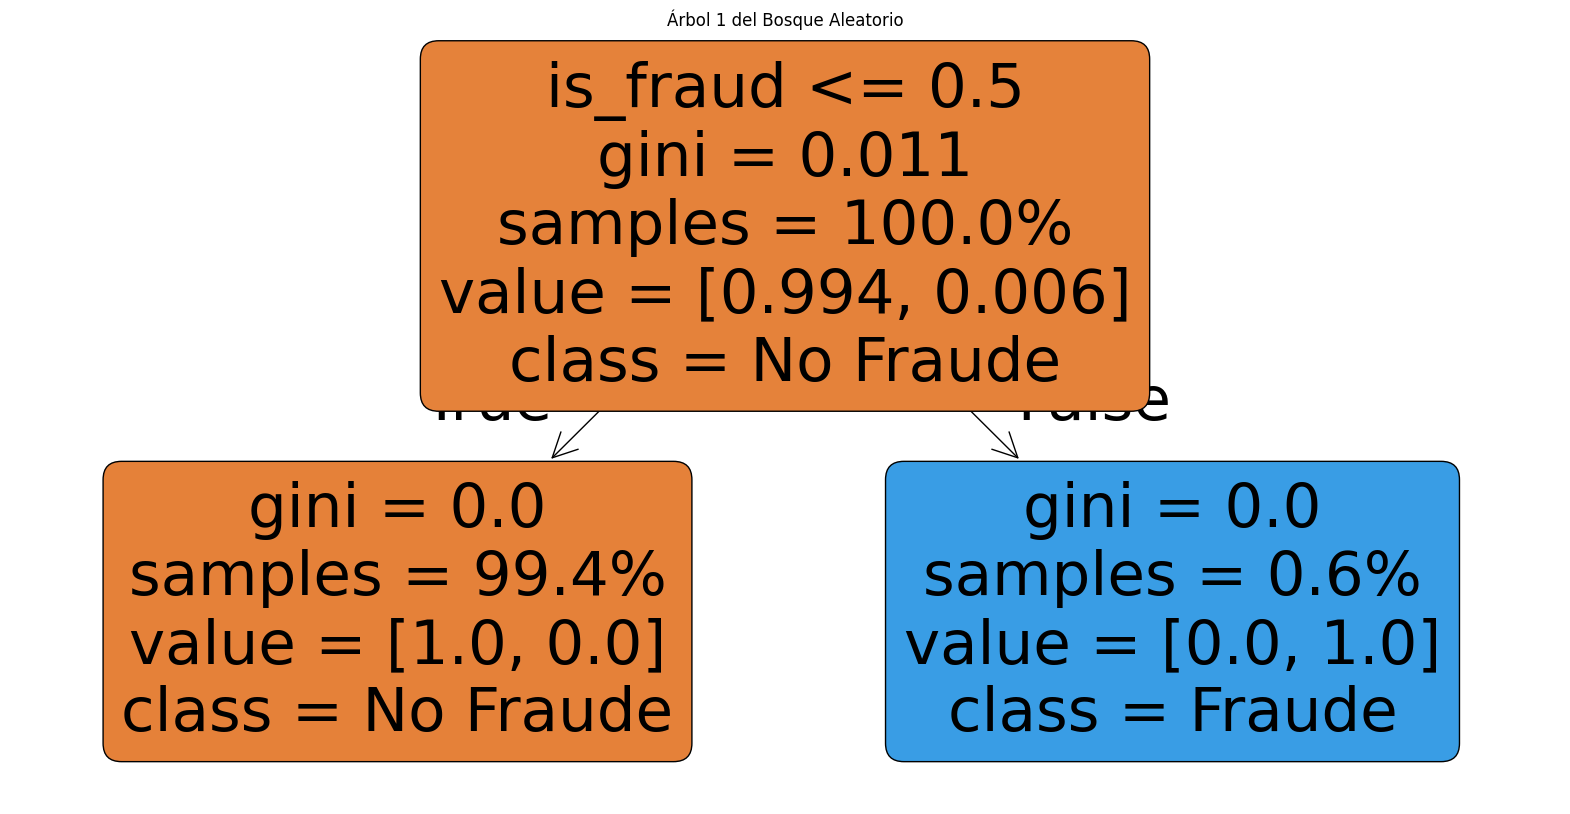

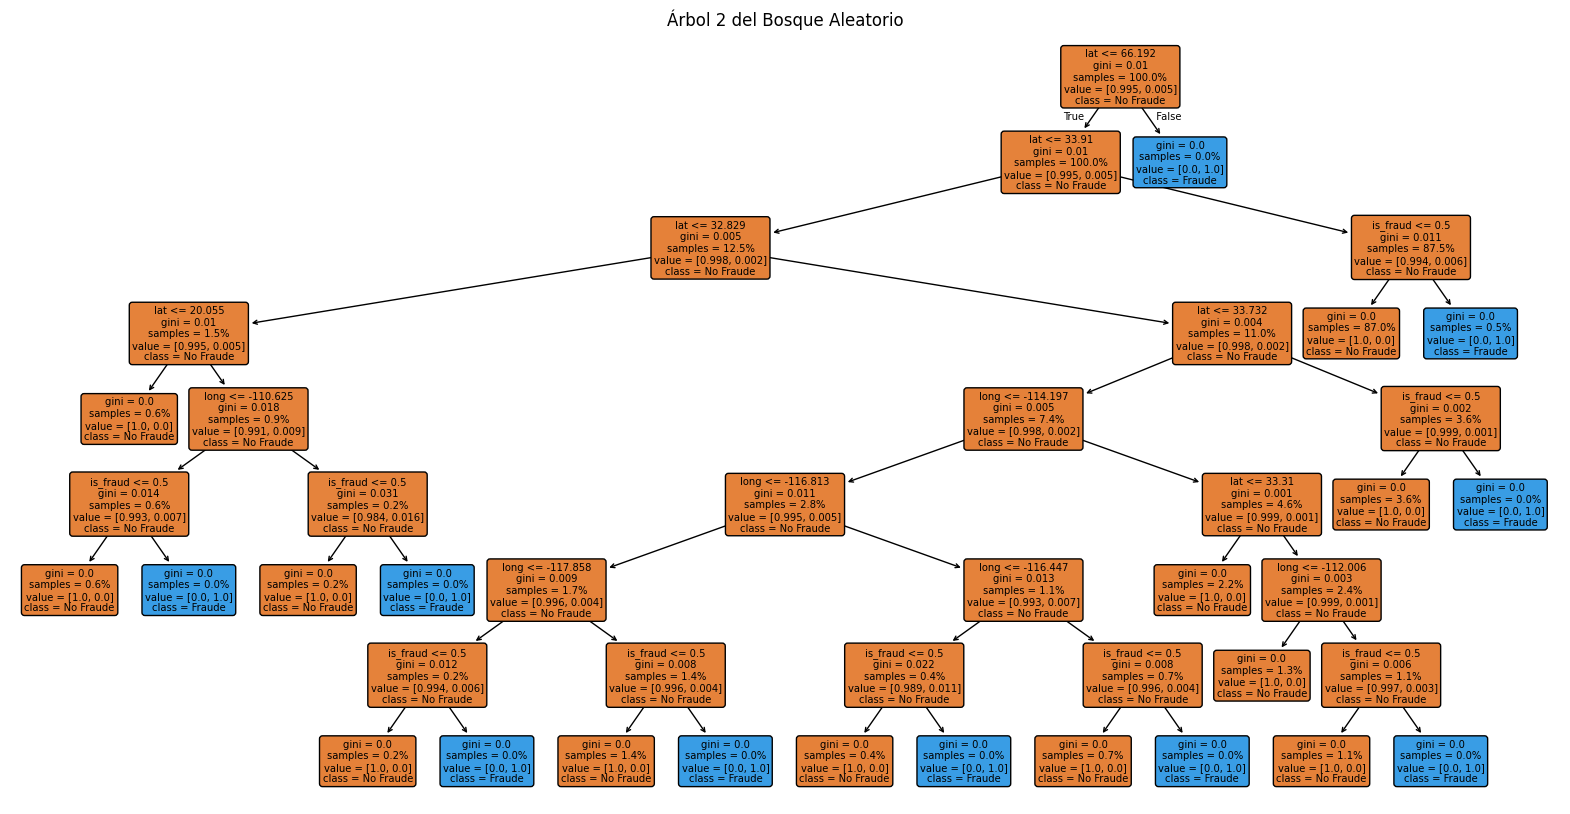

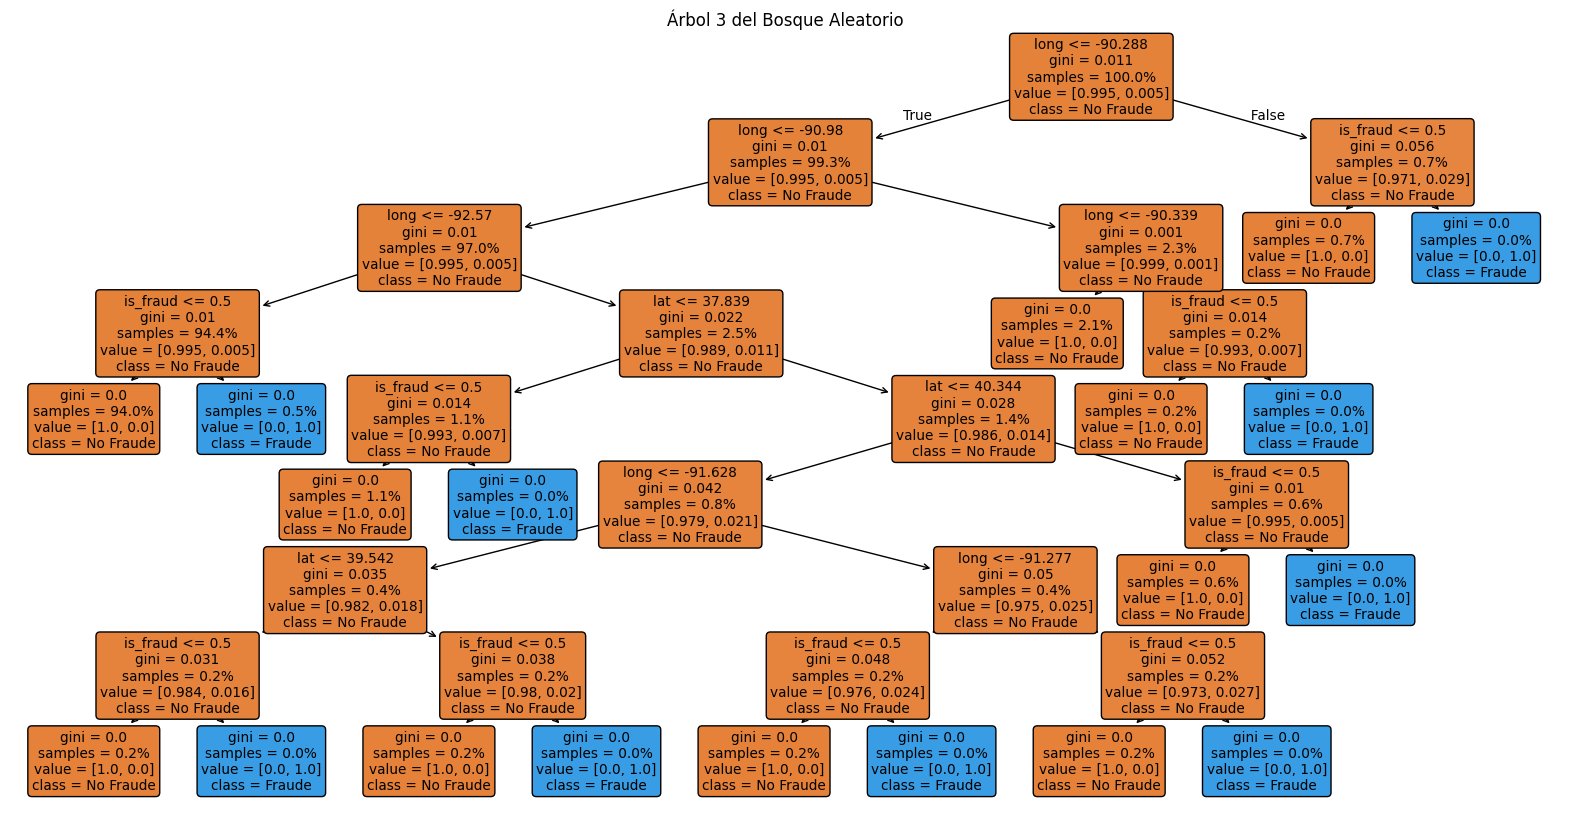

In [ ]:
  # Graficar solo los primeros 3 árboles del bosque
  for i, arbol in enumerate(bosque.estimators_[:3]):  # Limitar a 3 árboles
      plt.figure(figsize=(20, 10))  # Tamaño de la figura
      plot_tree(
          arbol,
          feature_names=columnas_aleatorias.columns,  # Nombres de las columnas seleccionadas
          filled=True,  # Colorear los nodos
          rounded=True,  # Forma redondeada de los nodos
          proportion=True,  # Mostrar proporciones en lugar de conteos
          class_names=["No Fraude", "Fraude"]  # Nombres de las clases (opcional)
      )
      plt.title(f"Árbol {i + 1} del Bosque Aleatorio")
      plt.show()

In [ ]:
# Seleccionar un árbol del bosque (por ejemplo, el primer árbol)
arbol = bosque.estimators_[0]

# Exportar el árbol a formato DOT
dot_data = export_graphviz(
    arbol,
    out_file=None,
    feature_names=columnas_aleatorias.columns,  # Nombres de las columnas seleccionadas
    class_names=['No Fraude', 'Fraude'],        # Nombres de las clases
    filled=True,                                # Colorear los nodos
    rounded=True,                               # Bordes redondeados
    special_characters=True                     # Caracteres especiales
)

# Crear y mostrar el gráfico
graph = graphviz.Source(dot_data)
graph

NameError: name 'export_graphviz' is not defined

In [ ]:
# X son las variebles dependientes

X = df_seleccionado.drop('is_fraud', axis=1)

# Y es la variable independiente
y = df_seleccionado['is_fraud']

# division del 75% de datos de entrenamiento, 25% de datos para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# creamos el modelo de arbol de decision y configuramos el maximo de nodos
Dt_model = tree.DecisionTreeClassifier(max_leaf_nodes=50)

# Entrenamos el modelo
Dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=50)

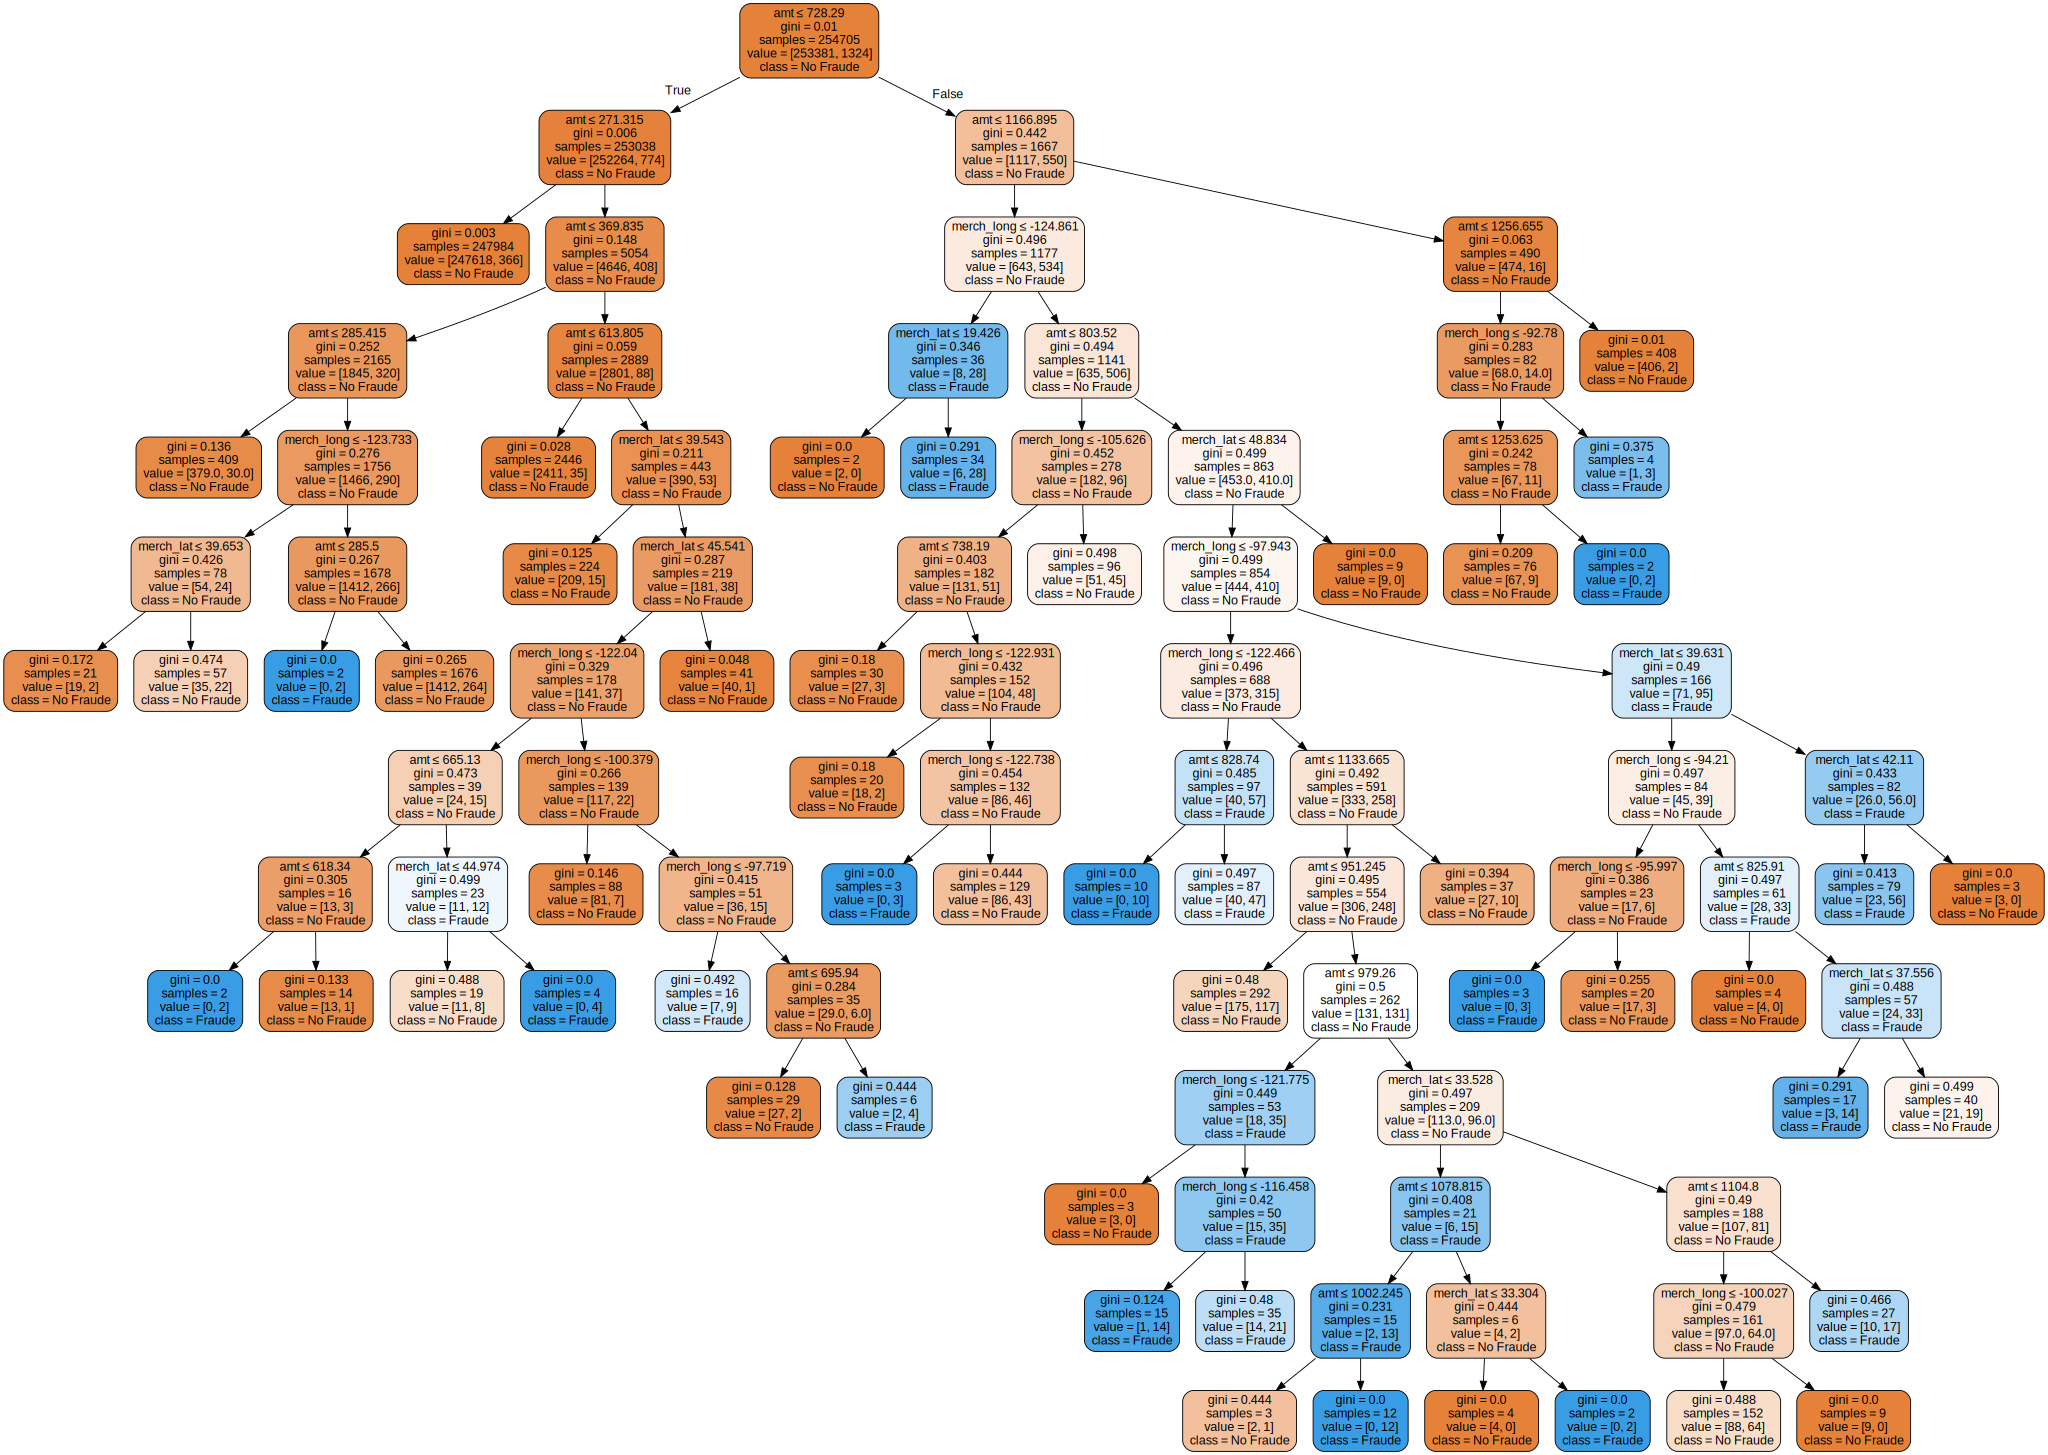

In [ ]:
import graphviz

dot_data = tree.export_graphviz(Dt_model, out_file=None,
                                feature_names=X.columns,
                                class_names=['No Fraude', 'Fraude'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
import pydot
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('arbol_decision.png')

In [ ]:
Dt_model.score(X_train, y_train)

0.9953750417149251

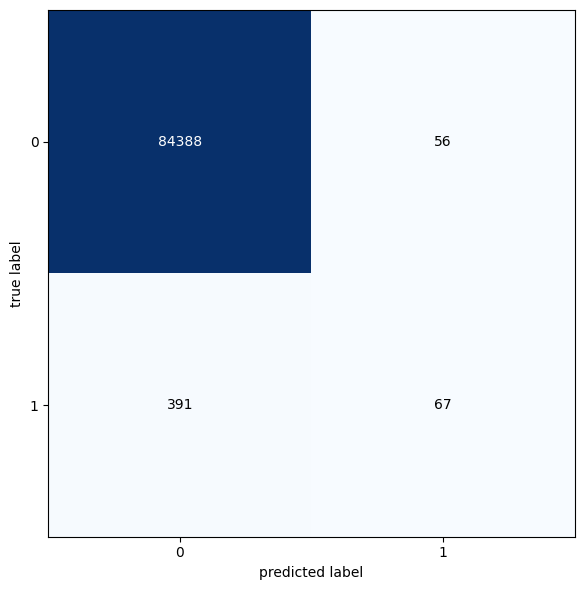

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = Dt_model.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=matriz_confusion, figsize=(6, 6), show_normed=False)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sobremuestreo con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[82016  2428]
 [  163   295]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84444
           1       0.11      0.64      0.19       458

    accuracy                           0.97     84902
   macro avg       0.55      0.81      0.58     84902
weighted avg       0.99      0.97      0.98     84902

